ETHICS Margaret Snape 02548166

Total Covariance: 0.490
Subgroup 0 covariance: -0.614
Subgroup 1 covariance: -0.509
Subgroup 2 covariance: -0.546


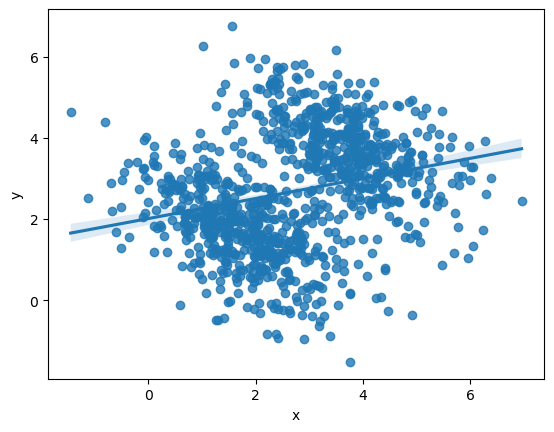

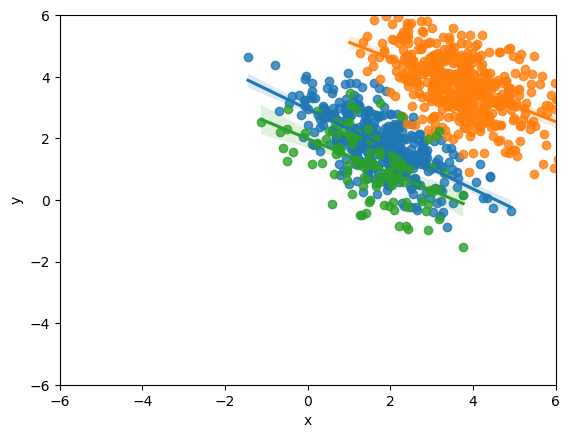

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#import utils as u
from IPython.core.display import HTML

def generate_gaussian_simpsons_paradox(n_subgroups=3, n_samples=1000):

    overall_cov = 3*np.array([[1,0.9], [0.9,1]])

    means = np.random.multivariate_normal(mean=[0,0], cov=overall_cov, size=n_subgroups)
    
    weights = np.random.uniform(size=n_subgroups)
    weights /= np.sum(weights)
    covs = [np.random.uniform(0.2,0.8) for _ in range(n_subgroups)]
    covs = [np.array([[1,-c], [-c,1]]) for c in covs]


    samples = []

    for sg, (mean, cov, w) in enumerate(zip(means, covs, weights)):
        n = int(round(n_samples * w))
        sample = np.random.multivariate_normal(mean=mean, cov=cov, size=n)
        sample = pd.DataFrame(sample, columns=["x", "y"])
        sample["z"] = sg
        samples.append(sample)
        
    df = pd.concat(samples)
    
    return df

df = generate_gaussian_simpsons_paradox()

print("Total Covariance: {:.3f}".format(df[["x", "y"]].cov().iloc[0,1]))
for z in df.z.unique():
    print("Subgroup {} covariance: {:.3f}".format(z,df[df.z==z][["x", "y"]].cov().iloc[0,1]))

sns.regplot(data=df, x="x", y="y");

fig, ax = plt.subplots()

plt.xlim(-6,6);
plt.ylim(-6,6);

for z in df.z.unique():
    sns.regplot(data=df[df.z==z], x="x", y="y", ax=ax)